<a href="https://colab.research.google.com/github/canxiu-zhang/ML_YUniv/blob/main/ml_1010/ind_projects/ind1_Movie_ROI_visulization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is the most successful movie?

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns
import datetime as dt
import pprint
%pprint
%matplotlib inline

Pretty printing has been turned ON


In [3]:
df = pd.read_csv('tmdb_movies_data.csv')

In [14]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

# Top 10 movies by adjusted Revenue

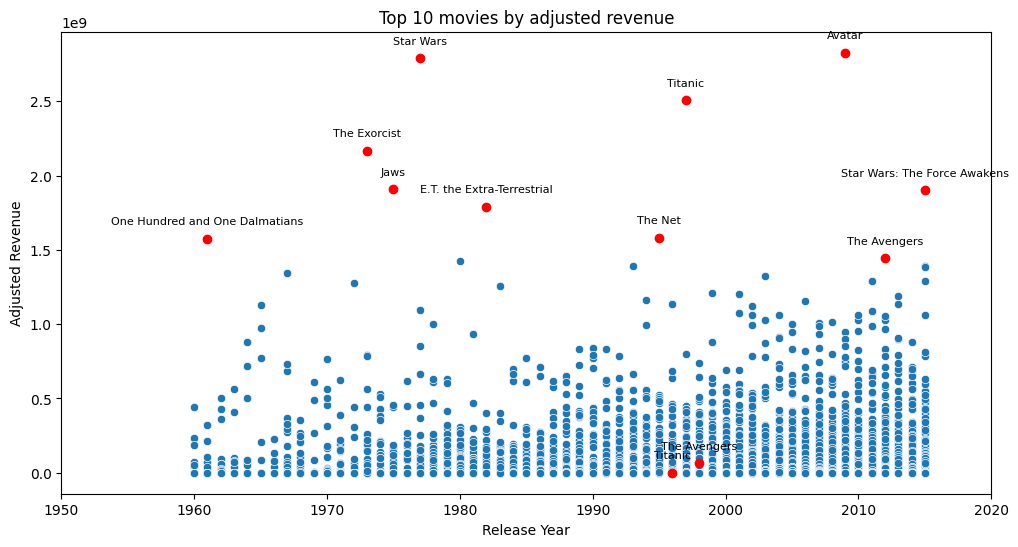

In [33]:
fig = plt.figure(figsize=(12,6))
# create scatter plot
ax = sns.scatterplot(data=df, x='release_year', y='revenue_adj')

# set top 10 revenue movies to different color
top10_movies = df.sort_values('revenue_adj', ascending=False).head(10)['original_title'].tolist()

for i, point in df.iterrows():
    if point['original_title'] in top10_movies:
        ax.scatter(point['release_year'], point['revenue_adj'], color='red')
        ax.annotate(point['original_title'], (point['release_year'], point['revenue_adj']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# show every 10 years on x-axis
xticks = ax.get_xticks()
ax.set_xticks(xticks[::1])
ax.set(title='Top 10 movies by adjusted revenue', xlabel='Release Year', ylabel='Adjusted Revenue')

plt.show()

In [24]:
df[df['original_title']=='Titanic']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/1997,4654,7.3,1997,2.716921e+08,2.506406e+09
8630,2699,tt0115392,0.219364,13000000,0,Titanic,Peter Gallagher|George C. Scott|Catherine Zeta...,NaN,Robert Lieberman,NaN,...,A story of the romances of two couples upon th...,173,Action|Drama|Romance,American Zoetrope,11/17/1996,21,6.1,1996,1.807282e+07,0.000000e+00


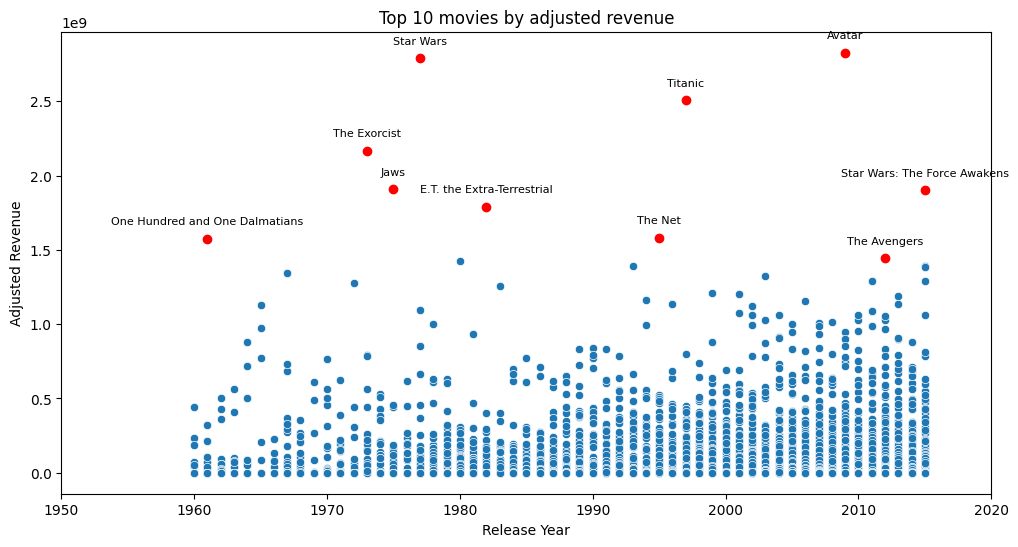

In [81]:
fig = plt.figure(figsize=(12,6))
# create scatter plot
ax = sns.scatterplot(data=df, x='release_year', y='revenue_adj')

# set top 10 revenue movies to different color
top10_movies = df.sort_values('revenue_adj', ascending=False).head(10)
top10_movies_title = [row['original_title'] for index, row in top10_movies.iterrows()]
top10_movies_id = [row['imdb_id'] for index, row in top10_movies.iterrows()]

for i, point in df.iterrows():
    if point['imdb_id'] in top10_movies_id:
        ax.scatter(point['release_year'], point['revenue_adj'], color='red')
        ax.annotate(point['original_title'], (point['release_year'], point['revenue_adj']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# show every 10 years on x-axis
xticks = ax.get_xticks()
ax.set_xticks(xticks[::1])
ax.set(title='Top 10 movies by adjusted revenue', xlabel='Release Year', ylabel='Adjusted Revenue')

plt.show()

# Top 10 movies by ROI

In [50]:
len(df[df['budget_adj']==0])

5696

In [54]:
len(df[df['budget_adj']<1000])

5754

In [59]:
df['roi'] = df.apply(lambda row: (row['revenue_adj'] - row['budget_adj'])/row['budget_adj'] if row['budget_adj']>1000 else 0, axis=1)

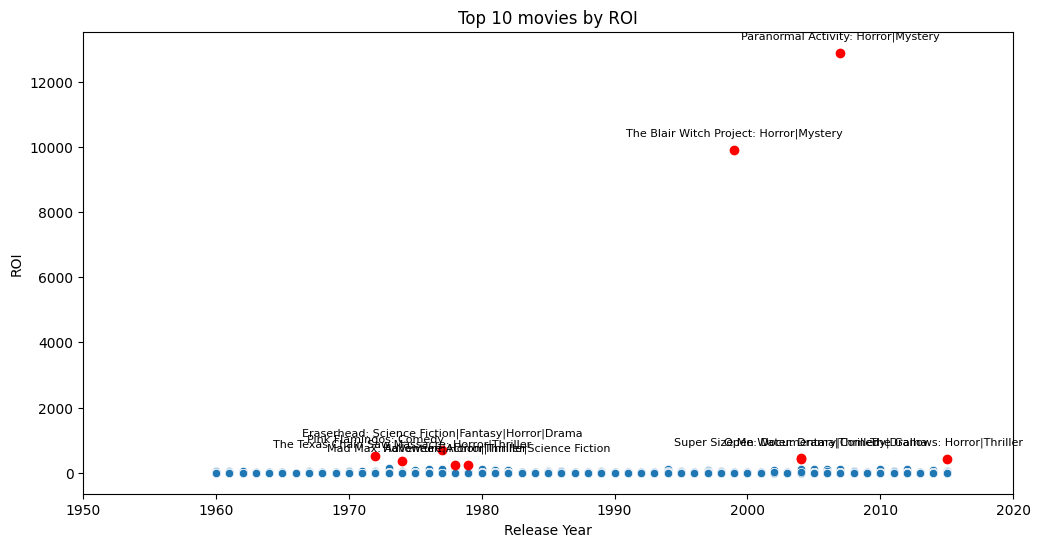

In [84]:
fig = plt.figure(figsize=(12,6))
# create scatter plot
ax = sns.scatterplot(data=df, x='release_year', y='roi')

# set top 10 revenue movies to different color
top10_movies = df.sort_values('roi', ascending=False).head(10)
top10_movies_title = [row['original_title'] for index, row in top10_movies.iterrows()]
top10_movies_id = [row['imdb_id'] for index, row in top10_movies.iterrows()]

for i, point in df.iterrows():
    if point['imdb_id'] in top10_movies_id:
        ax.scatter(point['release_year'], point['roi'], color='red')
        ax.annotate(point['original_title']+': '+point['genres'], (point['release_year'], point['roi']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# show every 10 years on x-axis
xticks = ax.get_xticks()
ax.set_xticks(xticks[::1])
ax.set(title='Top 10 movies by ROI', xlabel='Release Year', ylabel='ROI')

plt.show()

In [75]:
df[df['original_title'] == 'Paranormal Activity']['roi']

7447    12889.386664
Name: roi, dtype: float64

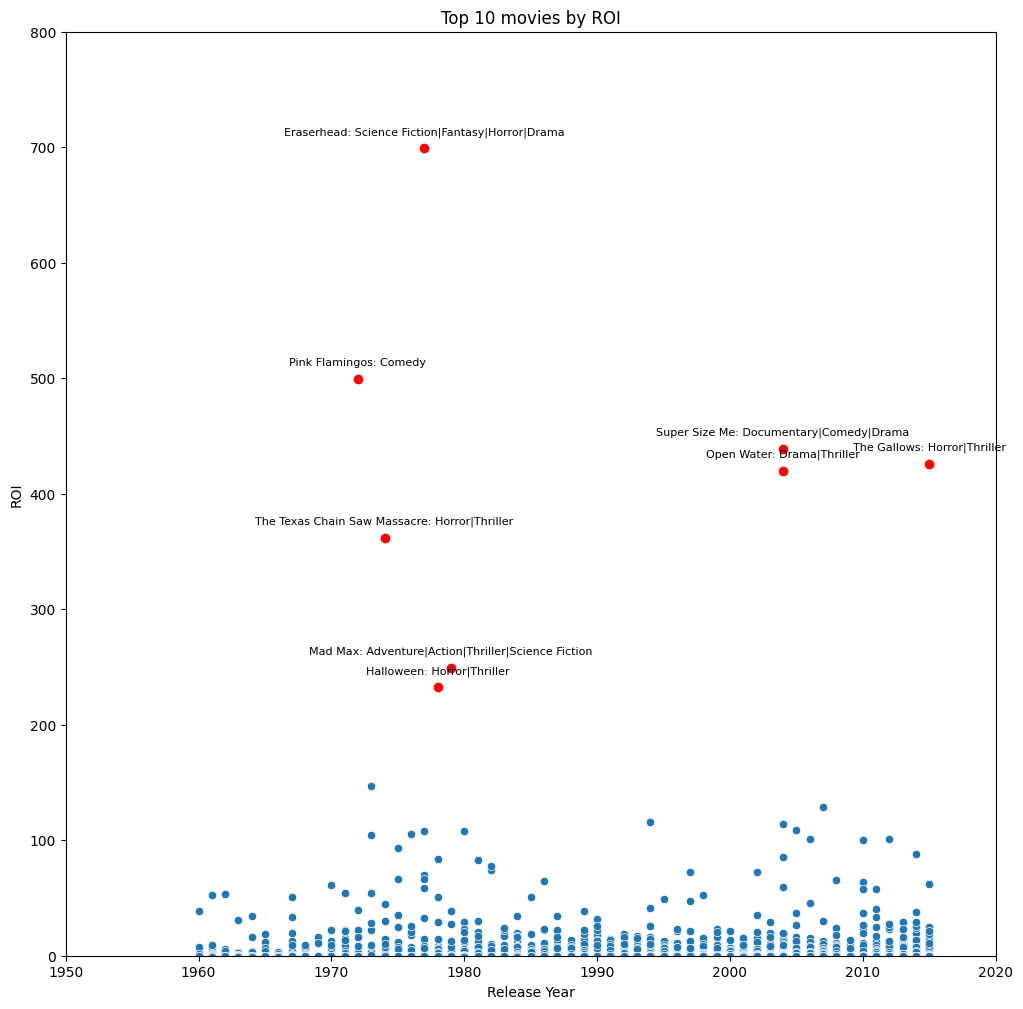

In [89]:
fig = plt.figure(figsize=(12,12))
# create scatter plot
ax = sns.scatterplot(data=df, x='release_year', y='roi')

# set top 10 revenue movies to different color
top10_movies = df.sort_values('roi', ascending=False).head(10)
top10_movies_title = [row['original_title'] for index, row in top10_movies.iterrows()]
top10_movies_id = [row['imdb_id'] for index, row in top10_movies.iterrows()]

for i, point in df.iterrows():
    if point['imdb_id'] in top10_movies_id:
        ax.scatter(point['release_year'], point['roi'], color='red')
        ax.annotate(point['original_title']+': '+point['genres'], (point['release_year'], point['roi']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# show every 10 years on x-axis
xticks = ax.get_xticks()
ax.set_xticks(xticks[::1])

ax.set_ylim(0, 800)

ax.set(title='Top 10 movies by ROI', xlabel='Release Year', ylabel='ROI')

plt.show()